In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt

In [67]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [68]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [69]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [70]:
print("NULL VALUES\n")
print(train_df.isna().sum(),end='\n\nTEST NULL VALUES\n')
print(test_df.isna().sum())

NULL VALUES

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

TEST NULL VALUES
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [71]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

## EDA

Text(0.5, 1.0, 'Transported Distribution')

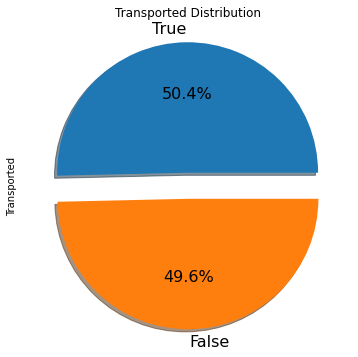

In [72]:
plt.figure(figsize=(6,6)).patch.set_facecolor("white")
train_df['Transported'].value_counts().plot.pie(textprops={'fontsize':16},shadow=True,explode=[0.1,0.1],autopct="%1.1f%%").set_title("Transported Distribution")

Text(0.5, 1.0, 'Age Distribution with Transported')

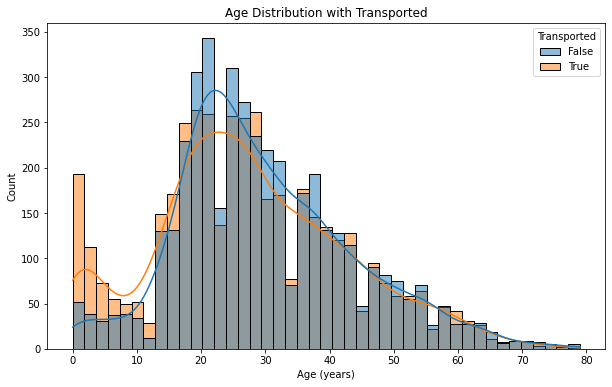

In [73]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_df,x='Age',hue='Transported',kde=True)
plt.xlabel("Age (years)")
plt.title("Age Distribution with Transported")

0-18 year old people were more likely to be transported<br>
18-25 year old people were less likely to be transported<br>
Over 25 year people were eqaually likelt to be transported than not<br>

#### Insight
Create a new feature which tells whether the person is child,adolescent or adult

##### Expenditures

In [74]:
expenditure_names = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

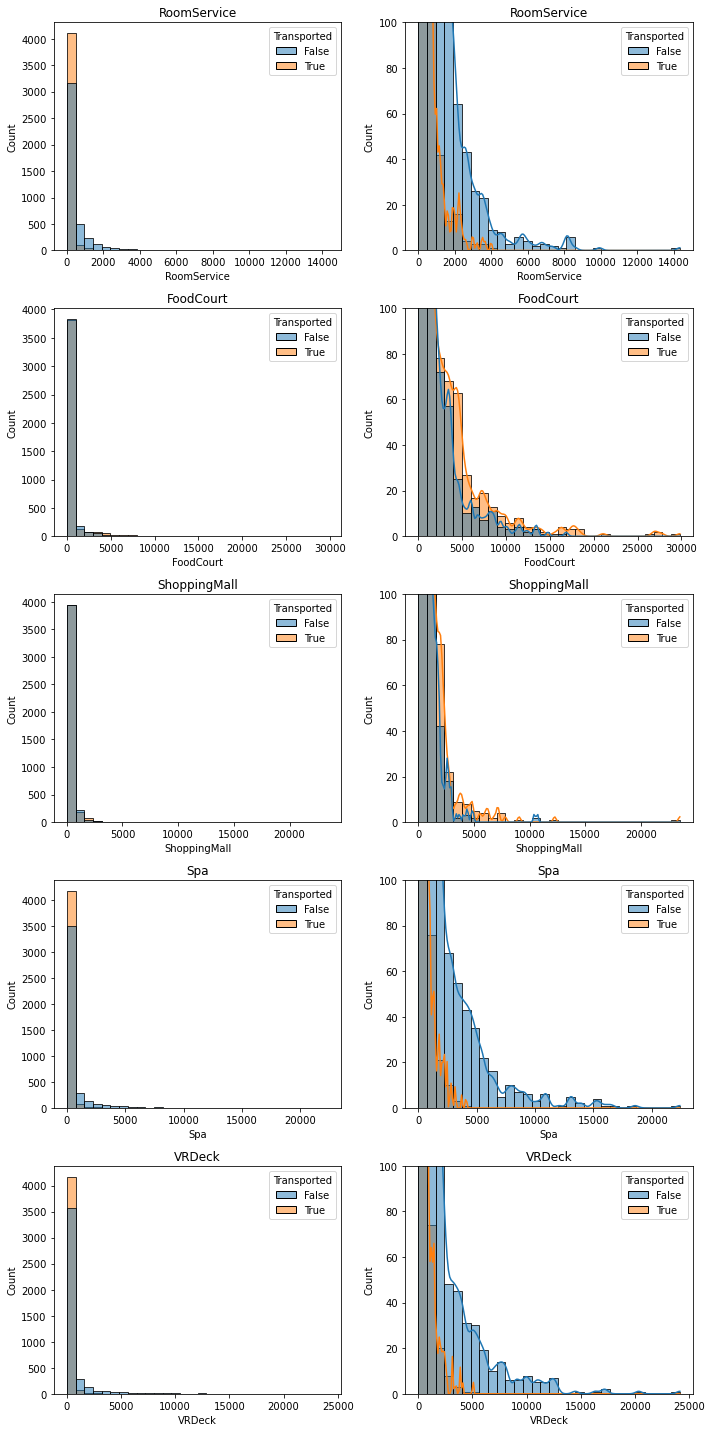

In [75]:
fig=plt.figure(figsize=(10,20))
for i, name in enumerate(expenditure_names):
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_df, x=name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(name)
    
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train_df, x=name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(name)
fig.tight_layout()
plt.show()

Notes:
* Most people don't spend any money (as we can see on the left).
* The distribution of spending decays exponentially (as we can see on the right).
* There are a small number of outliers.
* People who were transported tended to spend less.
* RoomService, Spa and VRDeck have different distributions to FoodCourt and ShoppingMall - we can think of this as luxury vs essential amenities. 

Insight:
* Create a new feature that tracks the total expenditure across all 5 amenities.
* Create a binary feature to indicate if the person has not spent anything. (i.e. total expenditure is 0).
* Take the log transform to reduce skew.

##### Categorical Features

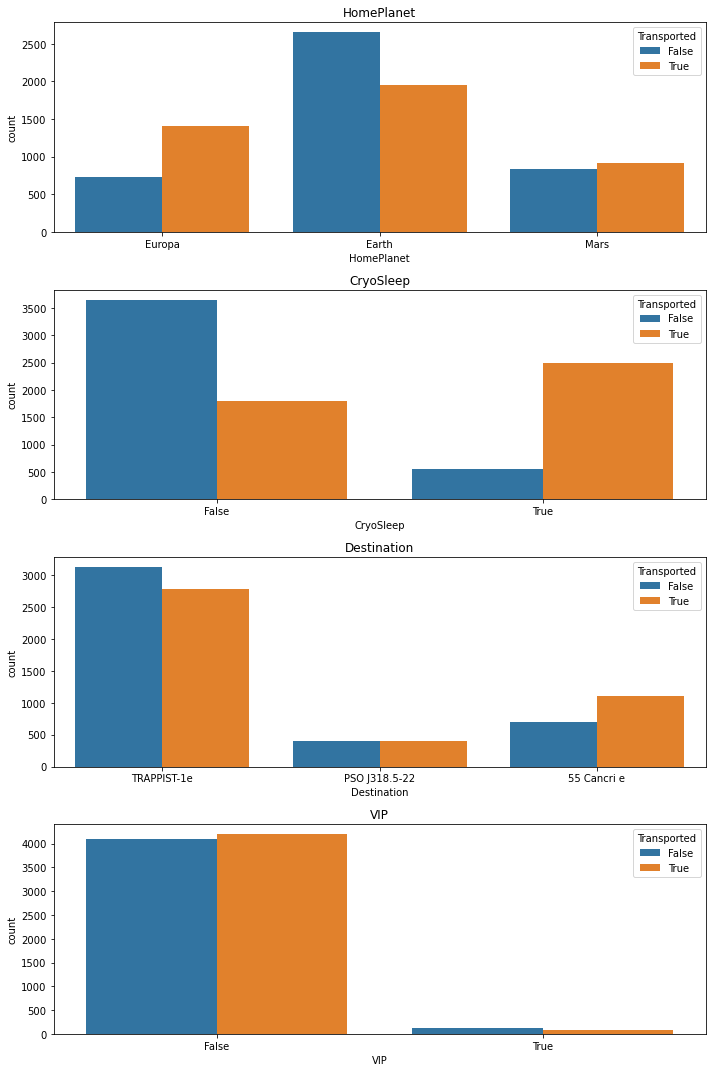

In [76]:
cat_features = ['HomePlanet','CryoSleep','Destination','VIP']
fig,ax = plt.subplots(4,1,figsize=(10,15))
for i,feature in enumerate(cat_features):
    sns.countplot(data=train_df,x=feature,ax=ax[i],hue="Transported")
    ax[i].set_title(feature)
fig.tight_layout()

Notes:<br>
1) VIP Feature does not appear to be useful as it is more or less equal.
2) Cryosleep is more useful in contrast

Insights<br>
1) We can remove VIP Feature.

##### Qualitative Features

In [77]:
qual_features = ['PassengerId','Cabin','Name']
test_df[qual_features].head()

,PassengerId,Cabin,Name
0,0013_01,G/3/S,Nelly Carsoning
1,0018_01,F/4/S,Lerome Peckers
2,0019_01,C/0/S,Sabih Unhearfus
3,0021_01,C/1/S,Meratz Caltilter
4,0023_01,F/5/S,Brence Harperez


PassengerId is of form gggg_pp where gggg indicates the group number in which they are travelling and pp indicates the people in the group<br>
Cabin takes the form deck/num/side where side can either be S (Starboard) or P (Port)<br><br>

Insights<br>
1) We can extract the grouo details from the passengerID feature<br>
2) We can extract the deck,number and side from the cabin feature<br>
3) We could extract the surname from names to identify families

### Feature Engineering

##### Age Status
Binning the features into groups

Text(0.5, 1.0, 'Age Group Distribution')

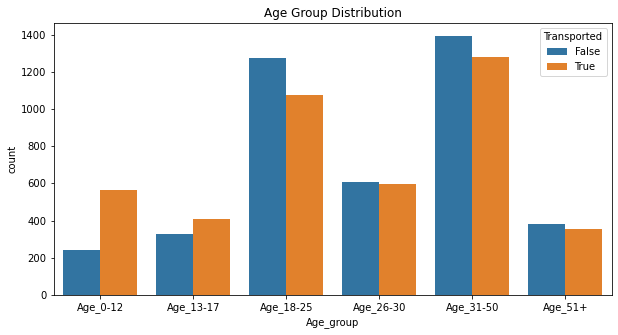

In [78]:
train_df['Age_group'] = np.nan
train_df.loc[train_df['Age']<=12,'Age_group'] = 'Age_0-12'
train_df.loc[(train_df['Age']>12) & (train_df['Age']<18), 'Age_group'] = 'Age_13-17'
train_df.loc[(train_df['Age']>=18) & (train_df['Age']<=25),'Age_group'] = 'Age_18-25'
train_df.loc[(train_df['Age']>25) & (train_df['Age']<=30),'Age_group'] = 'Age_26-30'
train_df.loc[(train_df['Age']>30) & (train_df['Age']<=50),'Age_group'] = 'Age_31-50'
train_df.loc[train_df['Age']>50,'Age_group'] = 'Age_51+'


test_df['Age_group'] = np.nan
test_df.loc[test_df['Age']<=12,'Age_group'] = 'Age_0-12'
test_df.loc[(test_df['Age']>12) & (test_df['Age']<18), 'Age_group'] = 'Age_13-17'
test_df.loc[(test_df['Age']>=18) & (test_df['Age']<=25),'Age_group'] = 'Age_18-25'
test_df.loc[(test_df['Age']>25) & (test_df['Age']<=30),'Age_group'] = 'Age_26-30'
test_df.loc[(test_df['Age']>30) & (test_df['Age']<=50),'Age_group'] = 'Age_31-50'
test_df.loc[test_df['Age']>50,'Age_group'] = 'Age_51+'

plt.figure(figsize=(10,5))
sns.countplot(data=train_df,x='Age_group',hue='Transported',order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title("Age Group Distribution")

##### Expenditures
Calculating passengers total expenditure and finding the ones with no expenditure

In [79]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Age_31-50
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Age_18-25
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Age_51+
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Age_31-50
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Age_13-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Age_31-50
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Age_18-25
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Age_26-30
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Age_31-50


Text(0.5, 1.0, 'No Expenditure')

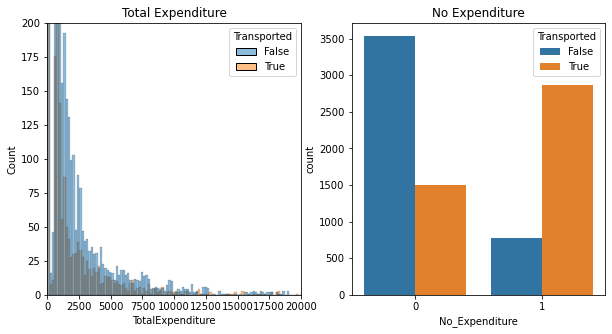

In [80]:
train_df['TotalExpenditure'] = train_df[expenditure_names].sum(axis=1)
train_df['No_Expenditure'] = (train_df['TotalExpenditure'] == 0).astype(int)

test_df['TotalExpenditure'] = test_df[expenditure_names].sum(axis=1)
test_df['No_Expenditure'] = (test_df['TotalExpenditure']==0).astype(int)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=train_df,x='TotalExpenditure',hue='Transported',bins=200)
plt.title("Total Expenditure")
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=train_df,x='No_Expenditure',hue='Transported')
plt.title("No Expenditure")

##### Passenger Group
We can extract group and group size from passengerID

Text(0.5, 1.0, 'Group Size')

c:\Users\user\Anaconda\envs\mlenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\user\Anaconda\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


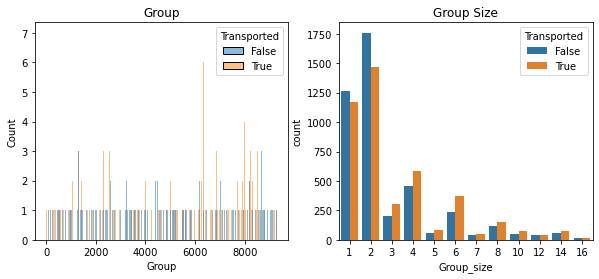

In [81]:
train_df['Group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test_df['Group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

train_df['Group_size'] = train_df['Group'].map(lambda x:pd.concat([train_df['Group'],test_df['Group']]).value_counts()[x])
test_df['Group_size'] = test_df['Group'].map(lambda x:pd.concat([train_df['Group'],test_df['Group']]).value_counts()[x])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=train_df,x='Group',hue='Transported',binwidth=1)
plt.title("Group")

plt.subplot(1,2,2)
sns.countplot(data=train_df,x='Group_size',hue='Transported')
plt.title("Group Size")

Here, we cannot really use the group feature in our models because it is too big of cardinality and would explode with one hot encoding<br>

The group_size is useful feature. we can compress the feature further by creating SOLO column that tracks whether someone is on there own or not

<AxesSubplot:xlabel='Solo', ylabel='count'>

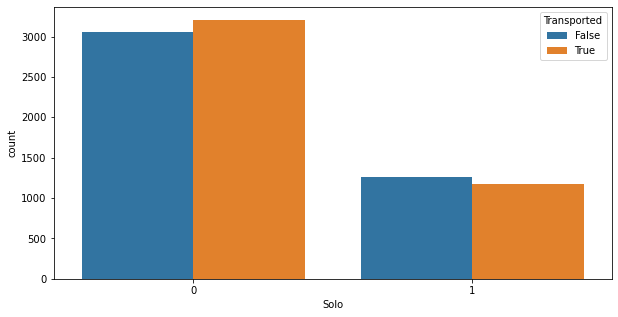

In [82]:
train_df['Solo'] = (train_df['Group_size']==1).astype(int)
test_df['Solo'] = (test_df['Group_size']==1).astype(int)


plt.figure(figsize=(10,5))
sns.countplot(data=train_df,x='Solo',hue='Transported')

##### Cabin Location

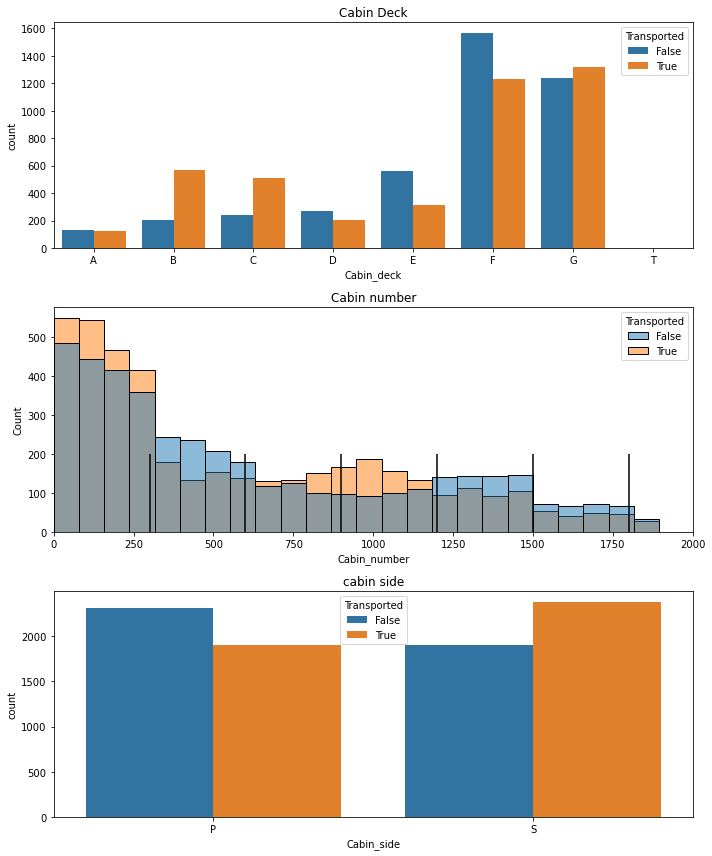

In [83]:
train_df['Cabin'].fillna('Z/9999/Z',inplace=True)
test_df['Cabin'].fillna('Z/9999/Z',inplace=True)

train_df['Cabin_deck'] = train_df['Cabin'].apply(lambda x:x.split('/')[0])
train_df['Cabin_number'] = train_df['Cabin'].apply(lambda x:x.split('/')[1]).astype(int)
train_df['Cabin_side'] = train_df['Cabin'].apply(lambda x:x.split('/')[2])


test_df['Cabin_deck'] = test_df['Cabin'].apply(lambda x:x.split('/')[0])
test_df['Cabin_number'] = test_df['Cabin'].apply(lambda x:x.split('/')[1]).astype(int)
test_df['Cabin_side'] = test_df['Cabin'].apply(lambda x:x.split('/')[2])

train_df.loc[train_df['Cabin_deck']=='Z','Cabin_deck'] = np.nan
train_df.loc[train_df['Cabin_number']==9999,'Cabin_number'] = np.nan
train_df.loc[train_df['Cabin_side']=='Z','Cabin_side'] = np.nan

test_df.loc[test_df['Cabin_deck']=='Z','Cabin_deck'] = np.nan
test_df.loc[test_df['Cabin_number']==9999,'Cabin_number'] = np.nan
test_df.loc[test_df['Cabin_side']=='Z','Cabin_side'] = np.nan


train_df.drop('Cabin',inplace=True,axis=1)
test_df.drop('Cabin',inplace=True,axis=1)

fig = plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df,x='Cabin_deck',hue='Transported',order=['A','B','C','D','E','F','G','T'])
plt.title("Cabin Deck")

plt.subplot(3,1,2)
sns.histplot(data=train_df,x='Cabin_number',hue='Transported')
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train_df,x='Cabin_side',hue='Transported')
plt.title("cabin side")
plt.tight_layout()

It appears that cabins are divided into chunks of 300. This means we can feature this into categorical one which indicates which cabin each passenger is in

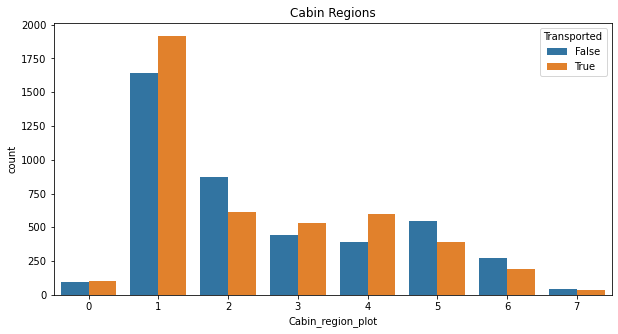

In [84]:
train_df['Cabin_Reg1'] = (train_df['Cabin_number']<300).astype(int)
train_df['Cabin_Reg2'] = ((train_df['Cabin_number']>=300) & (train_df['Cabin_number']<600)).astype(int)
train_df['Cabin_Reg3'] = ((train_df['Cabin_number']>=600) & (train_df['Cabin_number']<900)).astype(int)
train_df['Cabin_Reg4'] = ((train_df['Cabin_number']>=900) & (train_df['Cabin_number']<1200)).astype(int)
train_df['Cabin_Reg5'] = ((train_df['Cabin_number']>=1200) & (train_df['Cabin_number']<1500)).astype(int)
train_df['Cabin_Reg6'] = ((train_df['Cabin_number']>=1500) & (train_df['Cabin_number']<1800)).astype(int)
train_df['Cabin_Reg7'] = ((train_df['Cabin_number']>=1800)).astype(int)

test_df['Cabin_Reg1'] = (test_df['Cabin_number']<300).astype(int)
test_df['Cabin_Reg2'] = ((test_df['Cabin_number']>=300) & (test_df['Cabin_number']<600)).astype(int)
test_df['Cabin_Reg3'] = ((test_df['Cabin_number']>=600) & (test_df['Cabin_number']<900)).astype(int)
test_df['Cabin_Reg4'] = ((test_df['Cabin_number']>=900) & (test_df['Cabin_number']<1200)).astype(int)
test_df['Cabin_Reg5'] = ((test_df['Cabin_number']>=1200) & (test_df['Cabin_number']<1500)).astype(int)
test_df['Cabin_Reg6'] = ((test_df['Cabin_number']>=1500) & (test_df['Cabin_number']<1800)).astype(int)
test_df['Cabin_Reg7'] = ((test_df['Cabin_number']>=1800)).astype(int)

plt.figure(figsize=(10,5))
train_df['Cabin_region_plot'] = (train_df['Cabin_Reg1'] + 2*train_df['Cabin_Reg2'] + 3*train_df['Cabin_Reg3'] + 4*train_df['Cabin_Reg4'] + 5*train_df['Cabin_Reg5'] + 6*train_df['Cabin_Reg6'] + 7*train_df['Cabin_Reg7'])  
sns.countplot(data=train_df,x='Cabin_region_plot',hue='Transported')
plt.title("Cabin Regions")
train_df.drop("Cabin_region_plot",inplace=True,axis=1)  

##### Last Name

Text(0.5, 1.0, 'Family Size')

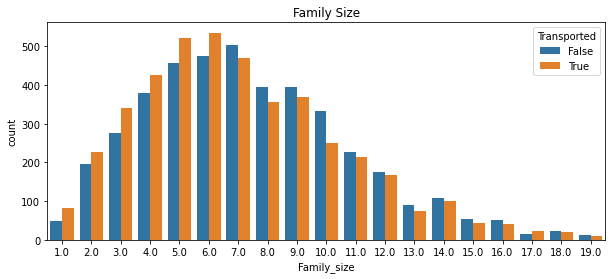

In [85]:
train_df['Name'].fillna('Unknown Unknown',inplace=True)
test_df['Name'].fillna('Unknown Unknown',inplace=True)

train_df['Surname'] = train_df['Name'].str.split().str[-1]
test_df['Surname'] = test_df['Name'].str.split().str[-1]

train_df['Family_size'] = train_df['Surname'].map(lambda x: pd.concat([train_df['Surname'],test_df['Surname']]).value_counts()[x])
test_df['Family_size'] = test_df['Surname'].map(lambda x: pd.concat([train_df['Surname'],test_df['Surname']]).value_counts()[x])

train_df.loc[train_df['Surname']=='Unknown','Surname'] = np.nan
train_df.loc[train_df['Family_size']>100,'Family_size'] = np.nan
test_df.loc[test_df['Surname']=='Unknown','Surname'] = np.nan
test_df.loc[test_df['Family_size']>100,'Family_size'] = np.nan

train_df.drop("Name",inplace=True,axis=1)
test_df.drop("Name",axis=1,inplace=True)

plt.figure(figsize=(10,4))
sns.countplot(data=train_df,x='Family_size',hue='Transported')
plt.title("Family Size")

## Missing Values
Combining training and testing data for removing missing values

In [86]:
y = train_df['Transported'].copy().astype(int)
X = train_df.drop('Transported',axis=1)

data = pd.concat([X,test_df],axis=0).reset_index(drop=True)
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Cabin_side,Cabin_Reg1,Cabin_Reg2,Cabin_Reg3,Cabin_Reg4,Cabin_Reg5,Cabin_Reg6,Cabin_Reg7,Surname,Family_size
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,P,1,0,0,0,0,0,0,Ofracculy,3.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,S,1,0,0,0,0,0,0,Vines,4.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,S,1,0,0,0,0,0,0,Susent,7.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,S,1,0,0,0,0,0,0,Susent,7.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,S,1,0,0,0,0,0,0,Santantines,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,...,S,0,0,0,0,1,0,0,Peter,10.0
12966,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,...,NaN,0,0,0,0,0,0,0,Scheron,6.0
12967,9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,...,P,1,0,0,0,0,0,0,Pore,4.0
12968,9273_01,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,...,P,1,0,0,0,0,0,0,Conale,7.0


In [87]:
na_cols = data.columns[data.isna().any()].tolist()

#Missing Values Summary
mv = pd.DataFrame(data[na_cols].isna().sum(),columns=['Number_missing'])
mv['percentage_missing'] = np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,percentage_missing
HomePlanet,288,2.22
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36
Spa,284,2.19
VRDeck,268,2.07


<AxesSubplot:>

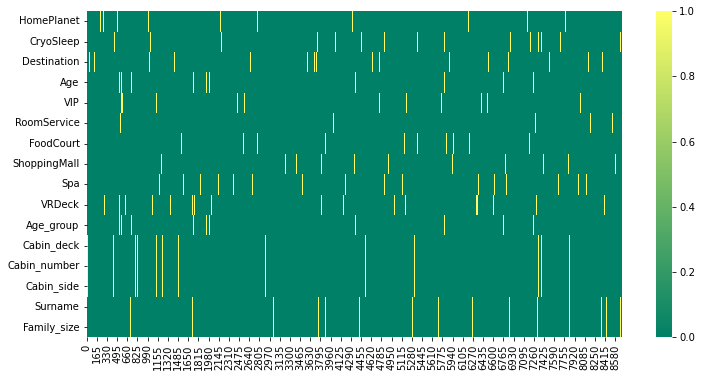

In [88]:
plt.figure(figsize=(12,6))
sns.heatmap(train_df[na_cols].isna().T,cmap='summer')

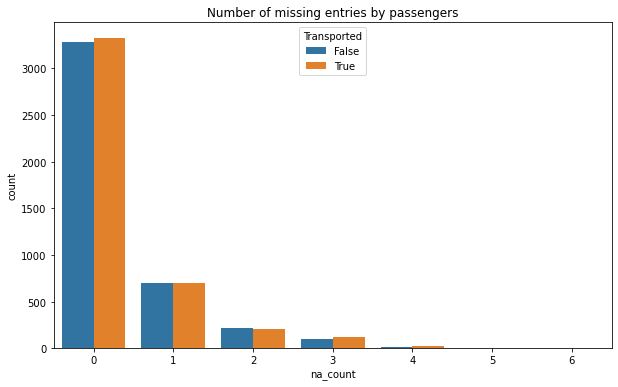

In [89]:
# Countplot of number of missing values by passenger
train_df['na_count'] = train_df.isna().sum(axis=1)
plt.figure(figsize=(10,6))
sns.countplot(data=train_df,x='na_count',hue='Transported')
plt.title("Number of missing entries by passengers")
train_df.drop("na_count",axis=1,inplace=True)

#### Notes:
1) Missing values are independent of the target and are isolated
2) Even thugh 2% of data is missing, 25% of passengers have atleast one missing value
3) PassengerID is the only original feature that does not have any missing values
